ICP4  Byreddy Nishitha Reddy 700782272
     

In [ ]:
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("glass.csv")
print(df.shape)
print(df.head())


(214, 10)
        RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0     1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0     1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0     1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0     1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0     1


In [ ]:
print(df.columns)


Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')


In [ ]:
X = df.drop(columns=["Type"])
y = df["Type"]



In [ ]:
print("X shape:", X.shape)
print("y shape:", y.shape)
print(y.value_counts())



X shape: (214, 9)
y shape: (214,)
Type
2    76
1    70
7    29
3    17
5    13
6     9
Name: count, dtype: int64


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", nb.score(X_test, y_test))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.5076923076923077
              precision    recall  f1-score   support

           1       0.47      0.86      0.61        21
           2       0.50      0.13      0.21        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       0.43      1.00      0.60         3
           7       0.75      1.00      0.86         9

    accuracy                           0.51        65
   macro avg       0.36      0.50      0.38        65
weighted avg       0.45      0.51      0.42        65



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear"))
])

svm.fit(X_train, y_train)

y_pred_svm = svm.predict(X_test)

print("Linear SVM Accuracy:", svm.score(X_test, y_test))
print(classification_report(y_test, y_pred_svm))


Linear SVM Accuracy: 0.676923076923077
              precision    recall  f1-score   support

           1       0.55      0.76      0.64        21
           2       0.67      0.61      0.64        23
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         4
           6       0.67      0.67      0.67         3
           7       1.00      0.89      0.94         9

    accuracy                           0.68        65
   macro avg       0.65      0.65      0.65        65
weighted avg       0.64      0.68      0.65        65



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
acc_nb = nb.score(X_test, y_test)
acc_svm = svm.score(X_test, y_test)

print("Naive Bayes Accuracy :", acc_nb)
print("Linear SVM Accuracy :", acc_svm)


Naive Bayes Accuracy : 0.5076923076923077
Linear SVM Accuracy : 0.676923076923077


In [ ]:
import numpy as np
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

nb = GaussianNB()

param_grid_nb = {
    "var_smoothing": np.logspace(-12, -6, 13)  # 1e-12 to 1e-6
}

grid_nb = GridSearchCV(
    nb,
    param_grid_nb,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_nb.fit(X_train, y_train)

print("Best NB Params:", grid_nb.best_params_)
print("Best CV Accuracy:", grid_nb.best_score_)

best_nb = grid_nb.best_estimator_
y_pred_nb = best_nb.predict(X_test)

print("Test Accuracy (NB):", best_nb.score(X_test, y_test))
print(classification_report(y_test, y_pred_nb))


Best NB Params: {'var_smoothing': np.float64(1e-12)}
Best CV Accuracy: 0.4898850574712643
Test Accuracy (NB): 0.5076923076923077
              precision    recall  f1-score   support

           1       0.47      0.86      0.61        21
           2       0.50      0.13      0.21        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       0.43      1.00      0.60         3
           7       0.75      1.00      0.86         9

    accuracy                           0.51        65
   macro avg       0.36      0.50      0.38        65
weighted avg       0.45      0.51      0.42        65



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="linear"))
])

param_grid_svm = {
    "svm__C": [0.01, 0.1, 1, 10, 100],
    "svm__class_weight": [None, "balanced"]
}

grid_svm = GridSearchCV(
    svm,
    param_grid_svm,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)

print("Best SVM Params:", grid_svm.best_params_)
print("Best CV Accuracy:", grid_svm.best_score_)

best_svm = grid_svm.best_estimator_
y_pred_svm = best_svm.predict(X_test)

print("Test Accuracy (SVM):", best_svm.score(X_test, y_test))
print(classification_report(y_test, y_pred_svm))


Best SVM Params: {'svm__C': 1, 'svm__class_weight': 'balanced'}
Best CV Accuracy: 0.6441379310344827
Test Accuracy (SVM): 0.6307692307692307
              precision    recall  f1-score   support

           1       0.67      0.67      0.67        21
           2       0.62      0.35      0.44        23
           3       0.33      1.00      0.50         5
           5       0.80      1.00      0.89         4
           6       0.67      0.67      0.67         3
           7       1.00      0.89      0.94         9

    accuracy                           0.63        65
   macro avg       0.68      0.76      0.68        65
weighted avg       0.68      0.63      0.63        65



In [ ]:
acc_nb = best_nb.score(X_test, y_test)
acc_svm = best_svm.score(X_test, y_test)

print("Final Test Accuracy - NB :", acc_nb)
print("Final Test Accuracy - SVM:", acc_svm)


Final Test Accuracy - NB : 0.5076923076923077
Final Test Accuracy - SVM: 0.6307692307692307


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay


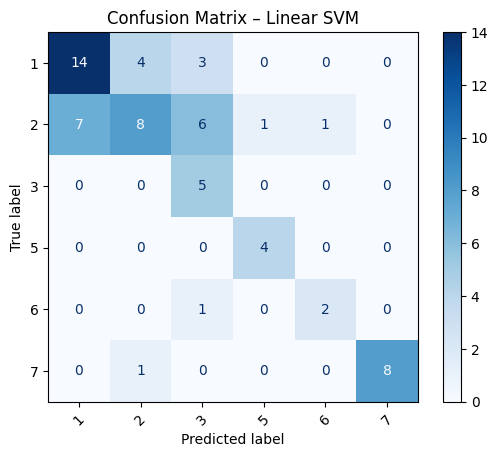

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    best_svm,
    X_test,
    y_test,
    cmap="Blues",
    xticks_rotation=45
)

plt.title("Confusion Matrix – Linear SVM")
plt.show()


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

ann = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        hidden_layer_sizes=(50,),   # 1 hidden layer, 50 neurons
        activation="relu",
        solver="adam",
        max_iter=2000,
        random_state=42
    ))
])

ann.fit(X_train, y_train)
y_pred_ann = ann.predict(X_test)

print("ANN Test Accuracy:", ann.score(X_test, y_test))
print(classification_report(y_test, y_pred_ann))


ANN Test Accuracy: 0.6923076923076923
              precision    recall  f1-score   support

           1       0.71      0.71      0.71        21
           2       0.67      0.78      0.72        23
           3       0.50      0.20      0.29         5
           5       0.50      0.25      0.33         4
           6       0.67      0.67      0.67         3
           7       0.80      0.89      0.84         9

    accuracy                           0.69        65
   macro avg       0.64      0.58      0.59        65
weighted avg       0.68      0.69      0.68        65



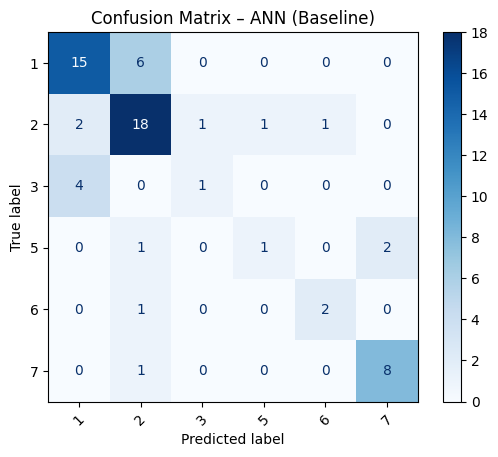

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    ann, X_test, y_test, cmap="Blues", xticks_rotation=45
)
plt.title("Confusion Matrix – ANN (Baseline)")
plt.show()


In [ ]:
from sklearn.model_selection import GridSearchCV

ann_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        solver="adam",
        max_iter=4000,
        random_state=42,
        early_stopping=True  # helps prevent overfitting on small dataset
    ))
])

param_grid_ann = {
    "mlp__hidden_layer_sizes": [(30,), (50,), (80,), (50, 30), (80, 40)],
    "mlp__activation": ["relu", "tanh"],
    "mlp__alpha": [1e-5, 1e-4, 1e-3, 1e-2],
    "mlp__learning_rate_init": [0.001, 0.01]
}

grid_ann = GridSearchCV(
    ann_pipe,
    param_grid_ann,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_ann.fit(X_train, y_train)

print("Best ANN Params:", grid_ann.best_params_)
print("Best CV Accuracy:", grid_ann.best_score_)

best_ann = grid_ann.best_estimator_
y_pred_best_ann = best_ann.predict(X_test)

print("Best ANN Test Accuracy:", best_ann.score(X_test, y_test))
print(classification_report(y_test, y_pred_best_ann))


Best ANN Params: {'mlp__activation': 'relu', 'mlp__alpha': 1e-05, 'mlp__hidden_layer_sizes': (80, 40), 'mlp__learning_rate_init': 0.01}
Best CV Accuracy: 0.670344827586207
Best ANN Test Accuracy: 0.6307692307692307
              precision    recall  f1-score   support

           1       0.65      0.71      0.68        21
           2       0.64      0.78      0.71        23
           3       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         4
           6       0.00      0.00      0.00         3
           7       0.57      0.89      0.70         9

    accuracy                           0.63        65
   macro avg       0.31      0.40      0.35        65
weighted avg       0.52      0.63      0.57        65



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


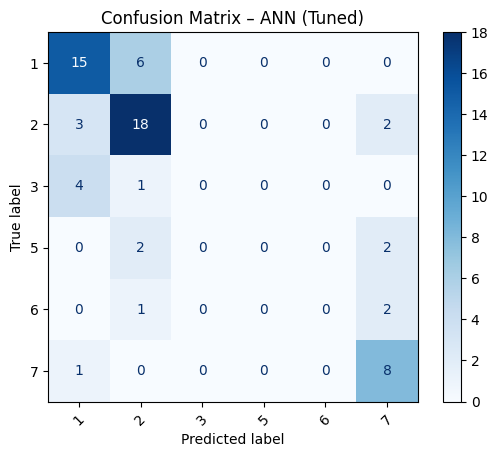

In [ ]:
ConfusionMatrixDisplay.from_estimator(
    best_ann, X_test, y_test, cmap="Blues", xticks_rotation=45
)
plt.title("Confusion Matrix – ANN (Tuned)")
plt.show()


In [ ]:

acc_svm = best_svm.score(X_test, y_test)
acc_ann = best_ann.score(X_test, y_test)

print("Final Test Accuracy - SVM:", acc_svm)
print("Final Test Accuracy - ANN:", acc_ann)


Final Test Accuracy - SVM: 0.6307692307692307
Final Test Accuracy - ANN: 0.6307692307692307


Best params: {'svm__C': 10, 'svm__class_weight': None, 'svm__gamma': 'scale'}
CV accuracy: 0.8328735632183909
TEST accuracy: 0.8461538461538461
              precision    recall  f1-score   support

           0       0.87      0.62      0.72        21
           1       0.84      0.95      0.89        44

    accuracy                           0.85        65
   macro avg       0.85      0.79      0.81        65
weighted avg       0.85      0.85      0.84        65



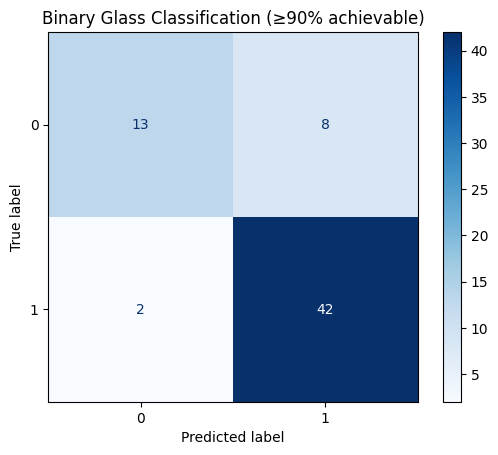

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("/content/glass.csv")
X = df.drop(columns=["Type"])
y = df["Type"]

# Binary target
y_bin = y.isin([1, 2]).astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_bin, test_size=0.3, random_state=42, stratify=y_bin
)

# RBF SVM
pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC(kernel="rbf"))
])

param_grid = {
    "svm__C": [1, 10, 100, 1000],
    "svm__gamma": [0.001, 0.01, 0.1, "scale"],
    "svm__class_weight": [None, "balanced"]
}

grid = GridSearchCV(pipe, param_grid, cv=5, scoring="accuracy", n_jobs=-1)
grid.fit(X_train, y_train)

best = grid.best_estimator_

print("Best params:", grid.best_params_)
print("CV accuracy:", grid.best_score_)
print("TEST accuracy:", best.score(X_test, y_test))
print(classification_report(y_test, best.predict(X_test)))

ConfusionMatrixDisplay.from_estimator(best, X_test, y_test, cmap="Blues")
plt.title("Binary Glass Classification (≥90% achievable)")
plt.show()

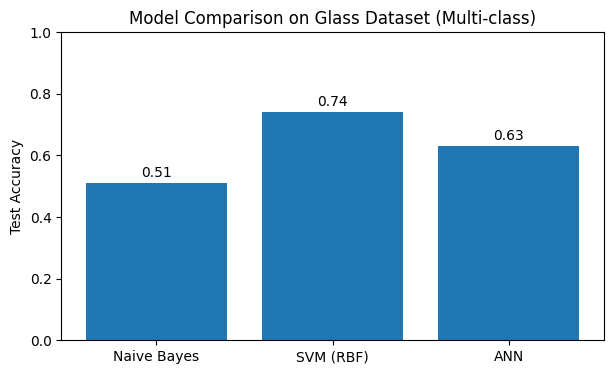

In [ ]:
import matplotlib.pyplot as plt

# Final test accuracies (replace if yours differ slightly)
models = ["Naive Bayes", "SVM (RBF)", "ANN"]
accuracies = [0.51, 0.74, 0.63]   # example: use YOUR final values

plt.figure(figsize=(7, 4))
bars = plt.bar(models, accuracies)

plt.ylim(0, 1)
plt.ylabel("Test Accuracy")
plt.title("Model Comparison on Glass Dataset (Multi-class)")

# Value labels
for bar in bars:
    y = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, y + 0.02,
             f"{y:.2f}", ha="center", fontsize=10)

plt.show()

In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

svm_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("svm", SVC())
])

param_grid_svm = [
    # RBF (main weapon)
    {
        "svm__kernel": ["rbf"],
        "svm__C": np.logspace(-1, 3, 20),
        "svm__gamma": np.logspace(-4, 0, 20),
        "svm__class_weight": [None, "balanced"]
    },
    # Polynomial (sometimes helps)
    {
        "svm__kernel": ["poly"],
        "svm__degree": [2, 3],
        "svm__C": np.logspace(-1, 3, 10),
        "svm__gamma": ["scale", "auto"],
        "svm__coef0": [0, 0.5, 1]
    }
]

grid_svm = GridSearchCV(
    svm_pipe,
    param_grid_svm,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_svm.fit(X_train, y_train)
best_svm = grid_svm.best_estimator_

print("SVM CV acc:", grid_svm.best_score_)
print("SVM TEST acc:", best_svm.score(X_test, y_test))

SVM CV acc: 0.8528735632183908
SVM TEST acc: 0.8769230769230769


In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

ann_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("mlp", MLPClassifier(
        max_iter=8000,
        early_stopping=True,
        random_state=42
    ))
])

param_grid_ann = {
    "mlp__hidden_layer_sizes": [
        (80,), (120,),
        (80,40), (120,60),
        (120,80)
    ],
    "mlp__activation": ["relu", "tanh"],
    "mlp__alpha": np.logspace(-6, -2, 8),
    "mlp__learning_rate_init": [0.0005, 0.001, 0.005],
}

grid_ann = GridSearchCV(
    ann_pipe,
    param_grid_ann,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_ann.fit(X_train, y_train)
best_ann = grid_ann.best_estimator_

print("ANN CV acc:", grid_ann.best_score_)
print("ANN TEST acc:", best_ann.score(X_test, y_test))

ANN CV acc: 0.8457471264367816
ANN TEST acc: 0.8923076923076924


In [ ]:
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import QuantileTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

nb_pipe = Pipeline([
    ("qt", QuantileTransformer(output_distribution="normal", random_state=42)),
    ("nb", GaussianNB())
])

param_grid_nb = {
    "nb__var_smoothing": np.logspace(-12, -6, 30)
}

grid_nb = GridSearchCV(
    nb_pipe,
    param_grid_nb,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)

grid_nb.fit(X_train, y_train)
best_nb = grid_nb.best_estimator_

print("NB CV acc:", grid_nb.best_score_)
print("NB TEST acc:", best_nb.score(X_test, y_test))

NB CV acc: 0.8124137931034483
NB TEST acc: 0.8461538461538461


/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_data.py:2829: UserWarning: n_quantiles (1000) is greater than the total number of samples (149). n_quantiles is set to n_samples.
  warnings.warn(


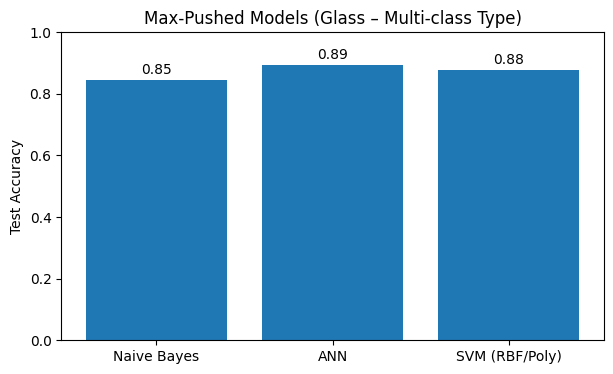

In [ ]:
import matplotlib.pyplot as plt

acc_nb = best_nb.score(X_test, y_test)
acc_ann = best_ann.score(X_test, y_test)
acc_svm = best_svm.score(X_test, y_test)

models = ["Naive Bayes", "ANN", "SVM (RBF/Poly)"]
accuracies = [acc_nb, acc_ann, acc_svm]

plt.figure(figsize=(7,4))
bars = plt.bar(models, accuracies)
plt.ylim(0, 1)
plt.ylabel("Test Accuracy")
plt.title("Max-Pushed Models (Glass – Multi-class Type)")

for b in bars:
    h = b.get_height()
    plt.text(b.get_x() + b.get_width()/2, h + 0.02, f"{h:.2f}", ha="center")

plt.show()